## Data set feature description
### Customer details:

- age;
- job;
- marital (relationship status);
- education (level of education);
- default (has got an expired credit);
- housing (has got a housing loan);
- loan (has got a personal loan);
- balance.

### Features related to the last contact:

- contact (contact type with a customer);
- month (month of the last contact);
- day (day of the last contact);
- duration (contact duration, seconds).

### Other features:

- campaign (quantity of contacts with a client durint the current campaign);
- pdays (quantity of days missed since the last marketing campaign till the contact in the current campaign);
- previous (quantity of contacts till the current campaign)
- poutcome (the result of the previous campaign).

### Target:

- deposit. Defines if a customer agrees to open a credit in a bank.

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import optuna
import seaborn as sns
from  sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing  import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn import linear_model 
from sklearn import tree 
from sklearn import ensemble 
from sklearn import metrics 
from sklearn import preprocessing 
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingClassifier, StackingClassifier
from sklearn.model_selection import train_test_split,GridSearchCV 
from sklearn.feature_selection import SelectKBest, f_classif

#import string

## Часть 1. Знакомство с данными, обработка пропусков и выбросов

### Задание 1

In [51]:
df = pd.read_csv('data/bank_fin.csv', sep = ';')

In [52]:
# исследуйте данные на предмет пропусков. Где есть пропущенные значения? Сколько их?
print(df.shape)
df.isna().sum().sort_values(ascending=False)

(11162, 17)


balance      25
age           0
day           0
poutcome      0
previous      0
pdays         0
campaign      0
duration      0
month         0
contact       0
job           0
loan          0
housing       0
default       0
education     0
marital       0
deposit       0
dtype: int64

In [53]:
df.iloc[2000:2020]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
2000,26,services,married,secondary,no,"77,00 $",yes,no,cellular,15,may,619,1,340,4,failure,yes
2001,35,blue-collar,married,primary,no,"22,00 $",yes,no,cellular,15,may,1190,2,302,2,other,yes
2002,22,blue-collar,single,secondary,no,"-51,00 $",yes,no,cellular,15,may,859,1,-1,0,unknown,yes
2003,26,blue-collar,single,secondary,no,"26,00 $",yes,yes,cellular,15,may,899,1,-1,0,unknown,yes
2004,28,admin.,single,secondary,no,"154,00 $",yes,no,cellular,15,may,536,1,364,1,other,yes
2005,35,admin.,divorced,secondary,no,"534,00 $",no,no,cellular,15,may,669,1,312,3,failure,yes
2006,35,housemaid,married,tertiary,no,"1 265,00 $",yes,no,cellular,15,may,326,5,179,4,failure,yes
2007,55,technician,married,tertiary,no,"-466,00 $",yes,no,cellular,15,may,901,1,-1,0,unknown,yes
2008,32,services,married,secondary,no,"38,00 $",yes,no,cellular,15,may,744,1,-1,0,unknown,yes
2009,28,management,single,secondary,no,"703,00 $",yes,no,cellular,15,may,485,1,88,1,other,yes


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11137 non-null  object
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(6), object(11)
memory usage: 1.4+ MB


### Задание 2

In [55]:
# есть ли в признаке job пропущенные значения? Возможно, они обозначены каким-то специальным словом?
df['job'].value_counts()

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64

### Задание 3

In [56]:
# преобразуйте признак balance таким образом, чтобы он корректно считывался, как вещественное число (float)

df['balance'] = df['balance'].apply(lambda x: str(x).replace(' ','').replace('$', '').replace(',', '.')).astype(np.float64)

print(df['balance'].mean().round(3))

1529.129


### Задание 4

In [57]:
# обработайте пропуски в признаки balance , заменив их на медианные значения по данному признаку
df['balance'] = df['balance'].fillna(df['balance'].median())

print(df['balance'].mean().round(3))

1526.936


### Задание 5

In [58]:
# обработайте пропуски в категориальных признаках: job и education, заменив их на модальные значения
df['education'] = df['education'].apply(lambda x: df['education'].mode()[0] if x == 'unknown' else x)
df['job'] = df['job'].apply(lambda x: df['job'].mode()[0] if x == 'unknown' else x)

In [59]:
pop_edu = df['education'].value_counts(ascending=False).reset_index()['education'][0]
pop_job = df['job'].value_counts(ascending=False).reset_index()['job'][0]

df[(df['education']==pop_edu) & (df['job']==pop_job)]['balance'].mean().round(3)

1598.883

### Задание 6

In [60]:
# удалите все выбросы для признака balance
def outliers_iqr_mod(data, feature, left=1.5, right=1.5, log_scale=False):
    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned, lower_bound, upper_bound

outliers, cleaned, low, high = outliers_iqr_mod(df, 'balance', log_scale=False)
print(f'Outliers according the Tjuki method: {outliers.shape[0]}')
dfc = cleaned
print(f'DF shape with outliers removed: {dfc.shape}')
print(f"low bound: {round(low,0)} | high bound: {round(high,0)}")

Outliers according the Tjuki method: 1057
DF shape with outliers removed: (10105, 17)
low bound: -2241.0 | high bound: 4063.0


## Часть 2:  Разведывательный анализ

### Задание 1

,deposit,count
0,no,5424
1,yes,4681


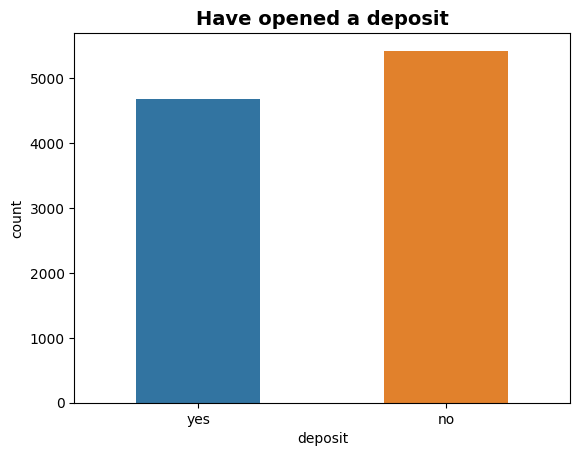

In [61]:
# изучите соотношение классов в ваших данных на предмет несбалансированности, проиллюстрируйте результат
display(dfc['deposit'].value_counts(normalize=False).reset_index().round(2))

cp = sns.countplot(dfc, x='deposit', width=0.5);
cp.set_title('Have opened a deposit', fontsize=14, fontweight='bold');

### Задания 2 и 3

In [62]:
#рассчитайте описательные статистики для количественных переменных, проинтерпретируйте результат
dfc.describe()

,age,balance,day,duration,campaign,pdays,previous
count,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000
mean,40.895497,807.653538,15.590302,368.742603,2.517170,51.319644,0.816230
std,11.734931,994.151966,8.441510,346.651524,2.707159,109.644179,2.243795
min,18.000000,-2049.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,95.000000,8.000000,137.000000,1.000000,-1.000000,0.000000
50%,38.000000,445.000000,15.000000,252.000000,2.000000,-1.000000,0.000000
75%,48.000000,1227.000000,22.000000,490.000000,3.000000,2.000000,1.000000
max,95.000000,4063.000000,31.000000,3881.000000,43.000000,854.000000,58.000000


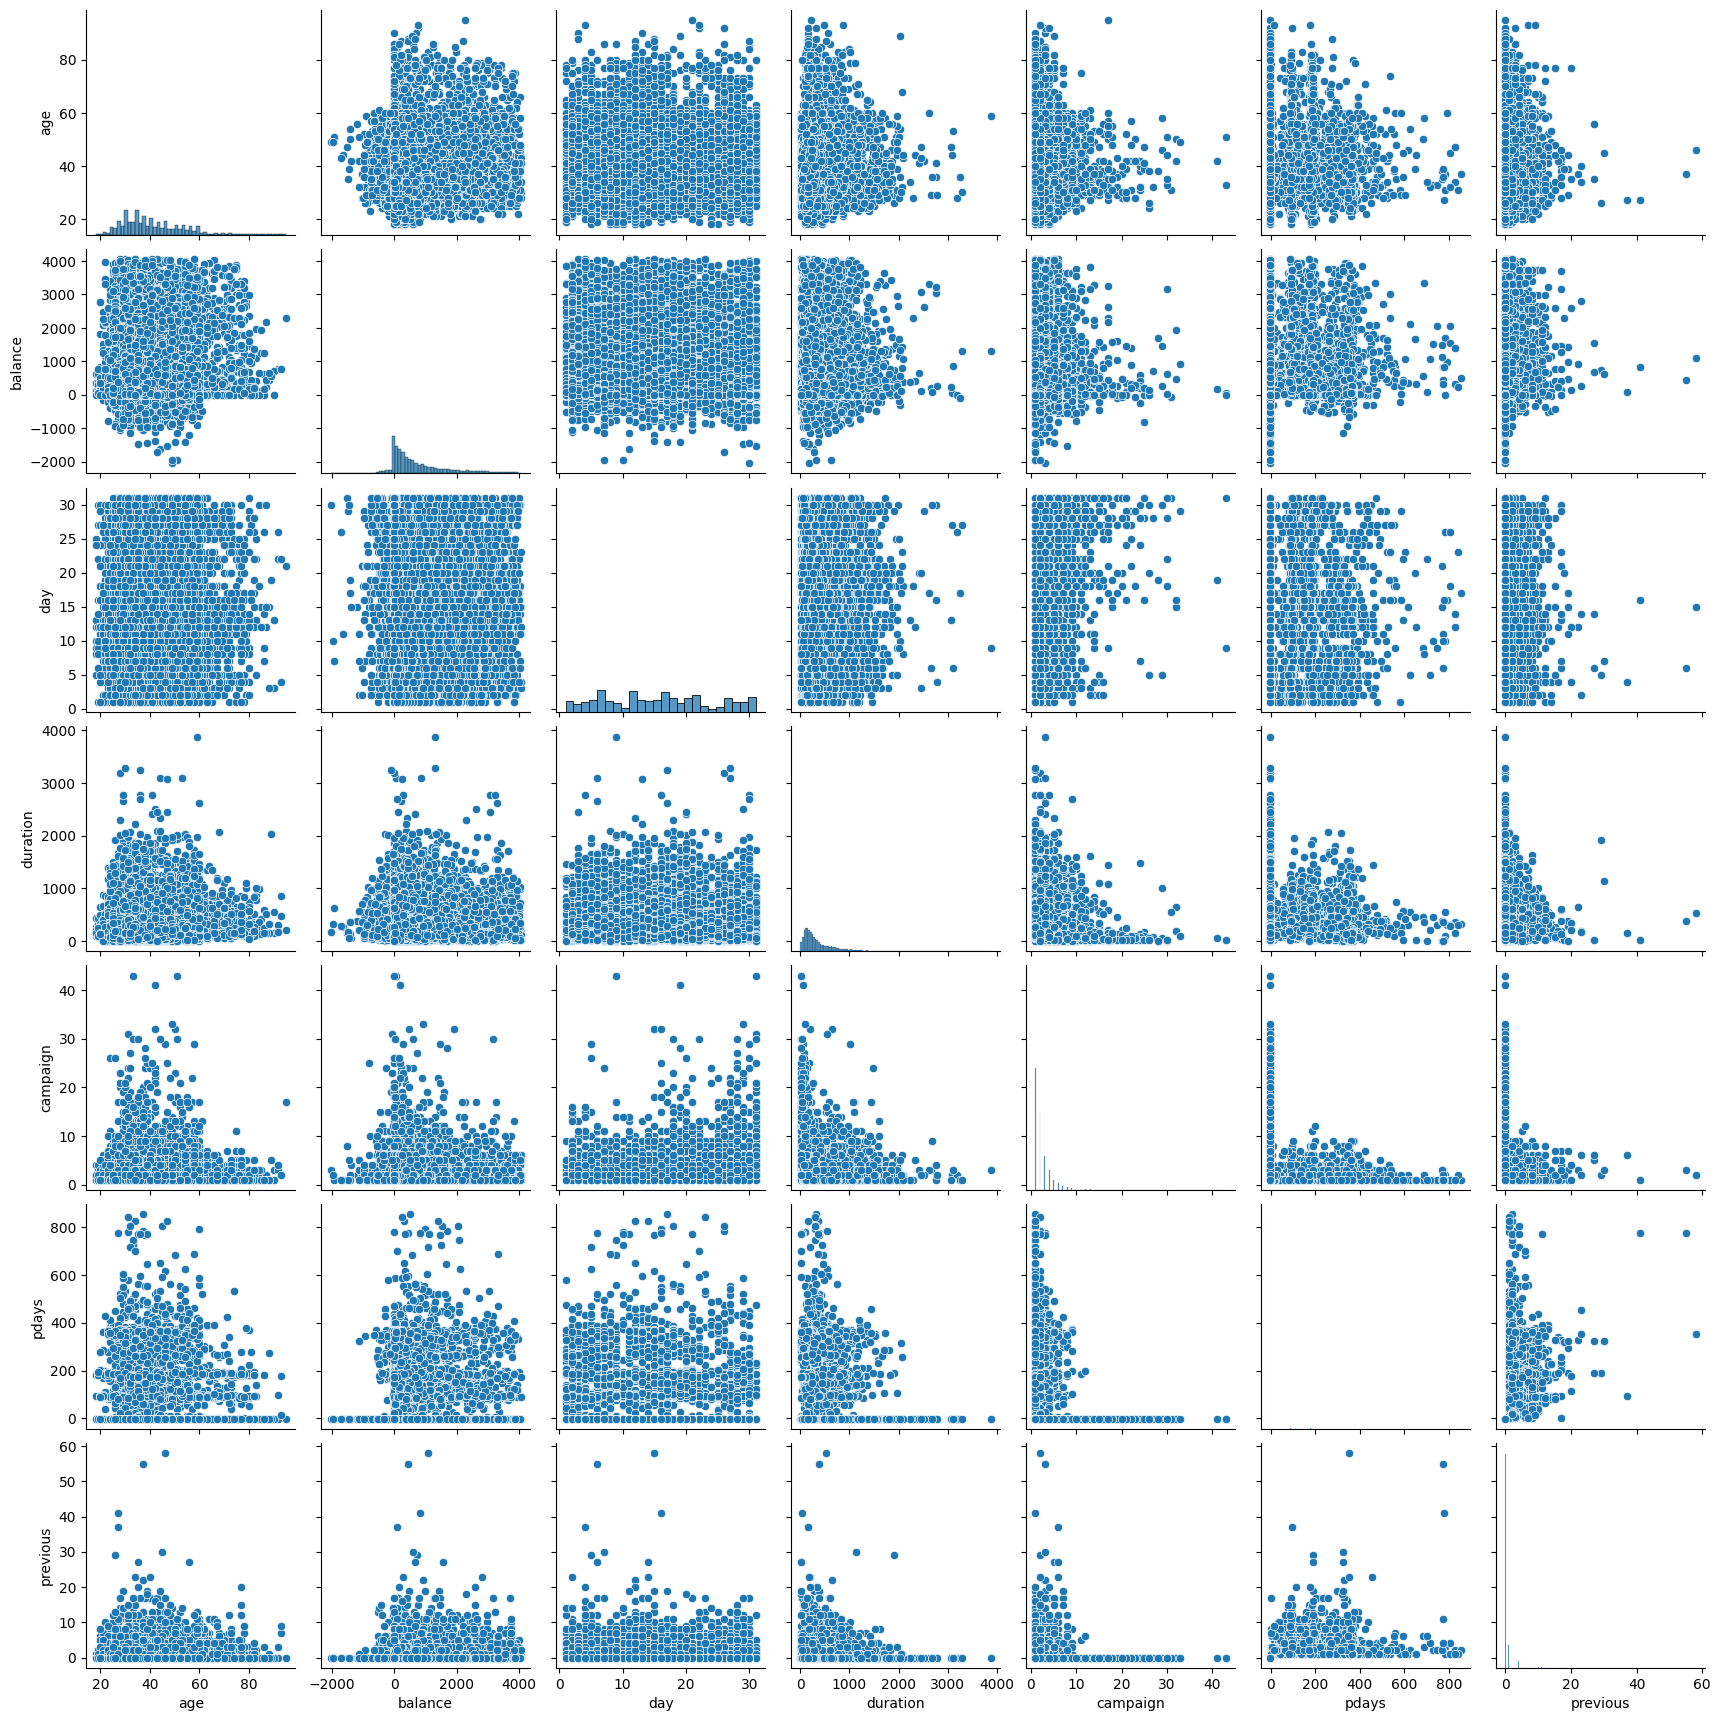

In [63]:
num_fea = dfc.dtypes[dfc.dtypes != 'object'].index.tolist()
sns.pairplot(dfc[num_fea])

In [64]:
#f,a = plt.subplots(nrows=len(num_fea), figsize=(6, 16))
#for t, g in enumerate(num_fea):
#    sns.histplot(dfc, x=g, ax=a[t]).set_title(g)
#plt.tight_layout()

<AxesSubplot: >

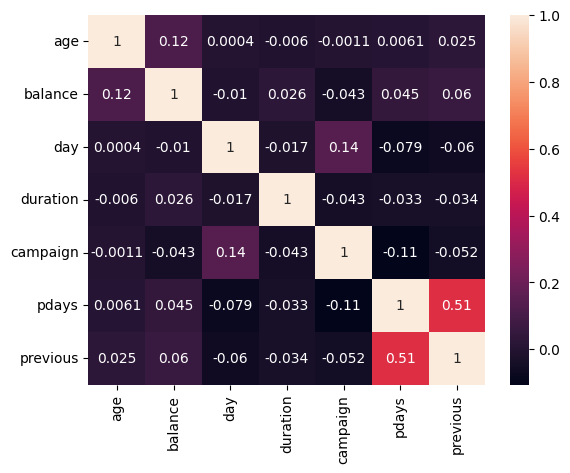

In [65]:
sns.heatmap(dfc.corr(numeric_only=True), annot=True)


### Задания 4 и 5

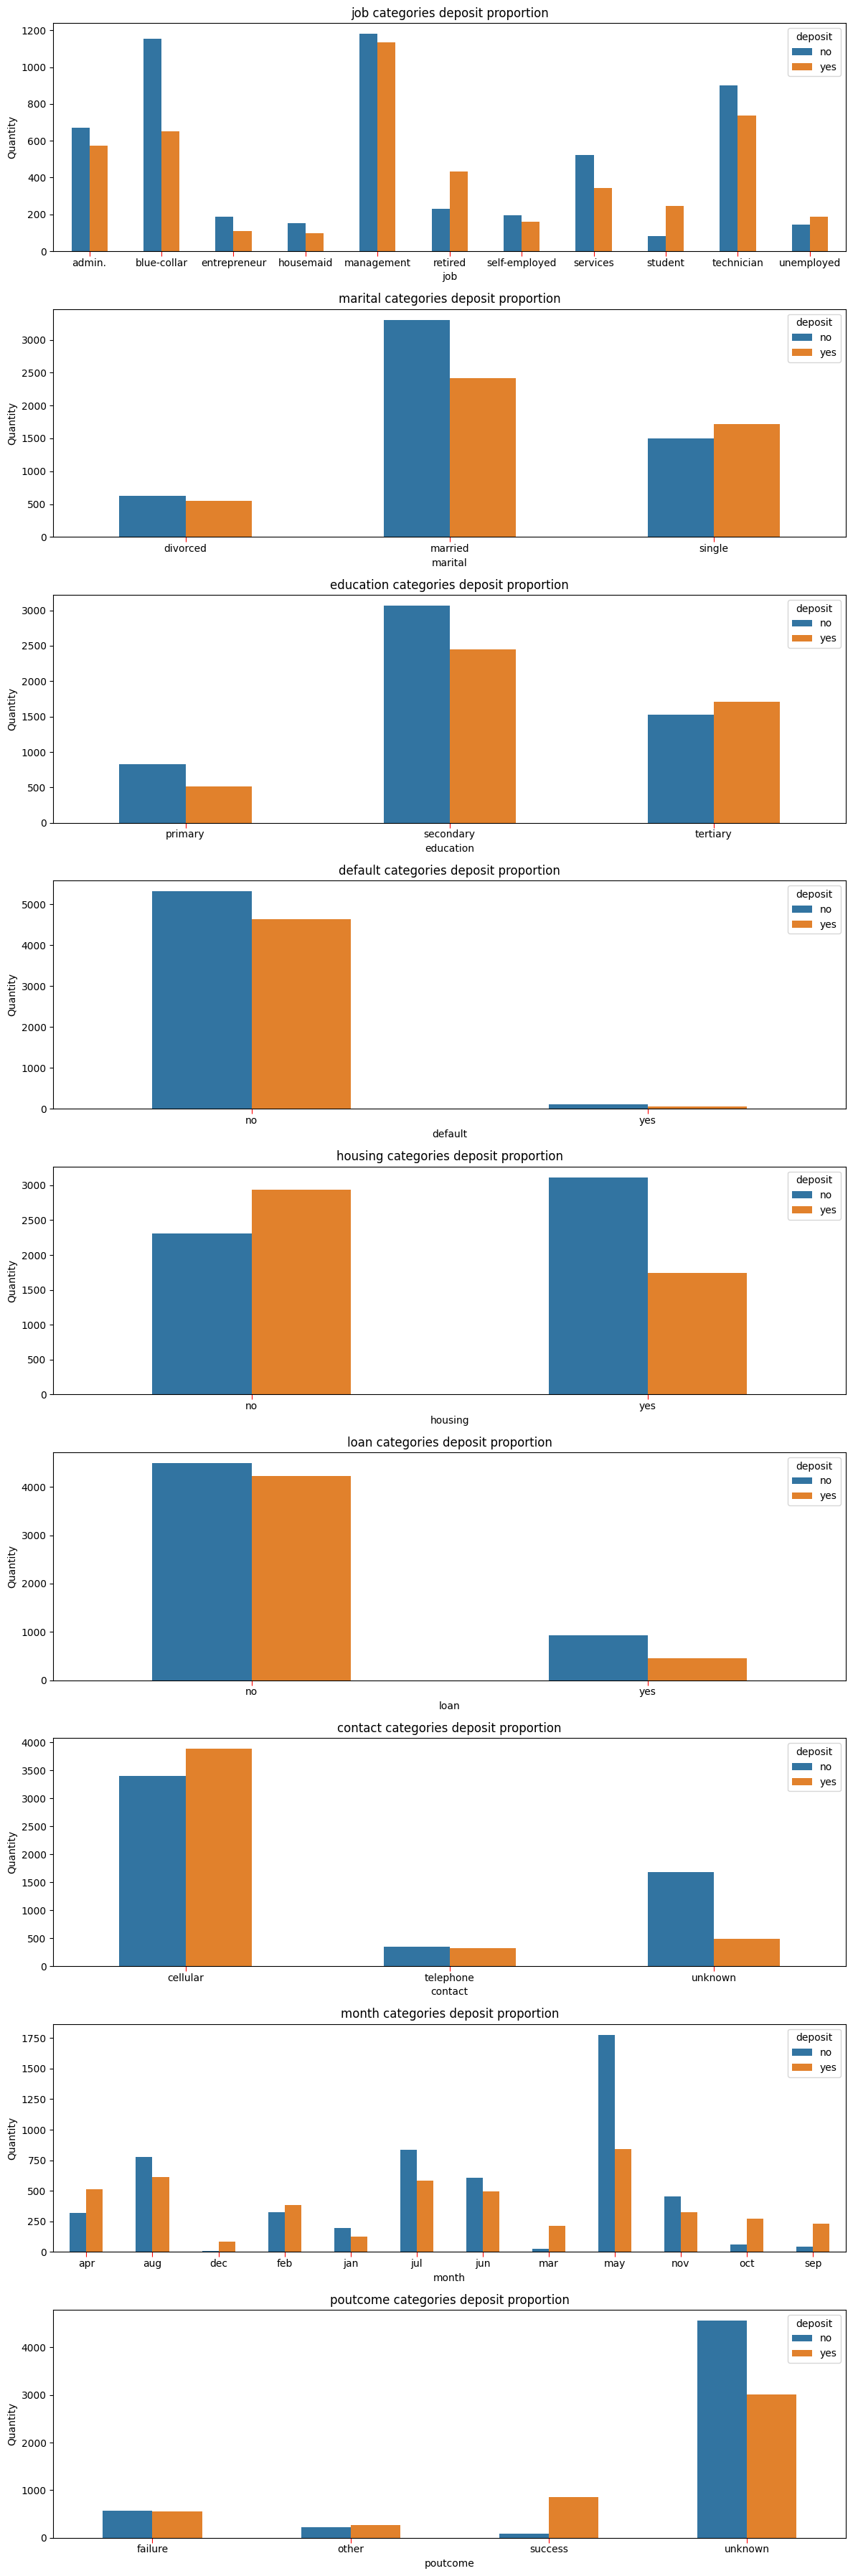

In [66]:
#рассчитайте описательные статистики для категориальных переменных, проинтерпретируйте результат
#ваш код
#постройте визуализации, иллюстрирующие результаты
cat_fea = dfc.dtypes[dfc.dtypes == 'object'].index.tolist()
cat_fea.remove('deposit')

f,a = plt.subplots(nrows=len(cat_fea), ncols=1, figsize=(12,36))
for k, m in enumerate(cat_fea):
    #fea_types = dfc[m].value_counts(normalize=True).sort_values(ascending=False).reset_index()
    #print(fea_types)
    #bp1 = sns.barplot(fea_types, x=m, y='proportion', ax=a[k][0], orient='v', width=0.5)
    #bp1.set(xlabel=m, ylabel='proportion', title=f"{m} categories proportion")
    #bp1.tick_params(axis='x',rotation=30, direction='out', pad=2, length=5, grid_alpha=0.3, which='both', color='red')
    #dfg = dfc.groupby(m)['deposit'].value_counts(normalize=True).reset_index()
    #bp2 = sns.barplot(dfg, x=m, y='proportion', hue='deposit', ax=a[k][1])
    #bp2.set(xlabel=m, ylabel='proportion', title=f"{m} categories deposit proportion")
    #bp2.tick_params(axis='x',rotation=30, direction='out', pad=2, length=5, grid_alpha=0.3, which='both', color='red')
    dfg = dfc.groupby([m, 'deposit'])['deposit'].count().rename('qty').reset_index()
    bp = sns.barplot(dfg, x=m, y='qty', hue='deposit', ax=a[k], width=0.5)
    bp.set(xlabel=m, ylabel='Quantity', title=f"{m} categories deposit proportion")
    bp.tick_params(axis='x',rotation=0, direction='out', pad=2, length=5, grid_alpha=0.3, which='both', color='red')
plt.tight_layout()

### Задание 6

In [67]:
# Узнайте, для какого статуса предыдущей маркетинговой кампании успех в текущей превалирует над количеством неудач.
dc = dfc.groupby(['poutcome', 'deposit'])['deposit'].count().unstack()
dc

deposit,no,yes
poutcome,,
failure,562,547
other,216,265
success,84,861
unknown,4562,3008


### Задание 7

,month,deposit,proportion
16,may,no,0.678640
8,jan,no,0.608150
10,jul,no,0.589563
18,nov,no,0.584615
2,aug,no,0.559567
12,jun,no,0.548913
7,feb,no,0.455571
1,apr,no,0.381928
21,oct,no,0.185075
23,sep,no,0.165468


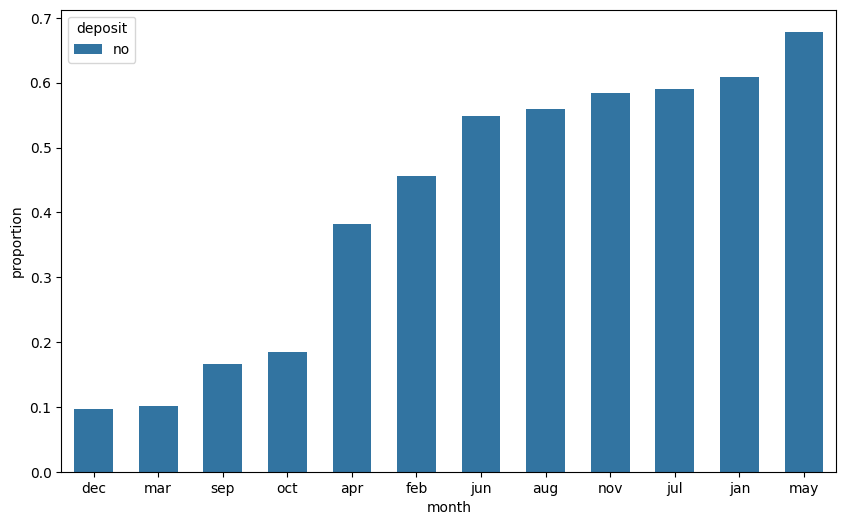

In [68]:
# узнайте, в каком месяце чаще всего отказывались от предложения открыть депозит
df_7 = dfc.groupby(['month'])['deposit'].value_counts(normalize=True).reset_index().sort_values(by=('proportion'))
plt.subplots(figsize=(10,6))
bp_7 = sns.barplot(df_7[df_7['deposit']=='no'], x='month', y='proportion', hue='deposit', width=0.6)
df_7[df_7['deposit']=='no'].sort_values(by='proportion', ascending=False)


### Задание 8

,age_group,deposit,proportion
0,30-40,no,0.576523
1,30-40,yes,0.423477
2,40-50,no,0.603104
3,40-50,yes,0.396896
4,50-60,no,0.574154
5,50-60,yes,0.425846
6,<30,yes,0.562032
7,<30,no,0.437968
8,>60,yes,0.810916
9,>60,no,0.189084


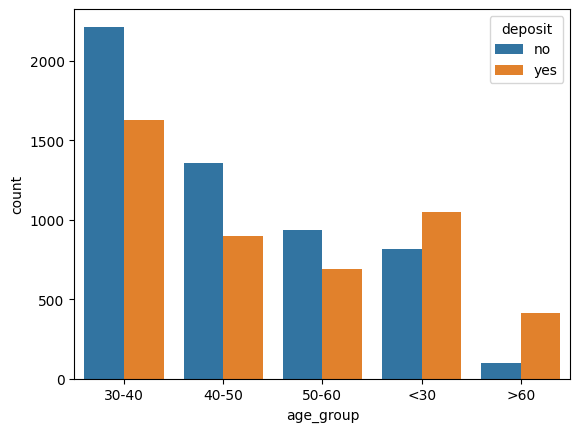

In [69]:
# создайте возрастные группы и определите, в каких группах более склонны открывать депозит, чем отказываться от предложения
#df['age_group'] = pd.cut(df.age, [0,30,40,50,60,9999], labels = ['<30','30-40','40-50','50-60','60+'])

def group_age(num):
    if num <=30:
        return '<30'
    elif num>30 and num<=40:
        return '30-40'
    elif num>40 and num<=50:
        return '40-50'
    elif num>50 and num<=60:
        return '50-60'
    else:
        return '>60'
    
dfc['age_group'] = dfc['age'].apply(group_age)
display(dfc.groupby('age_group')['deposit'].value_counts(normalize=True).reset_index())

sns.countplot(dfc.sort_values(by='age_group'), x='age_group', hue='deposit').set_title('');

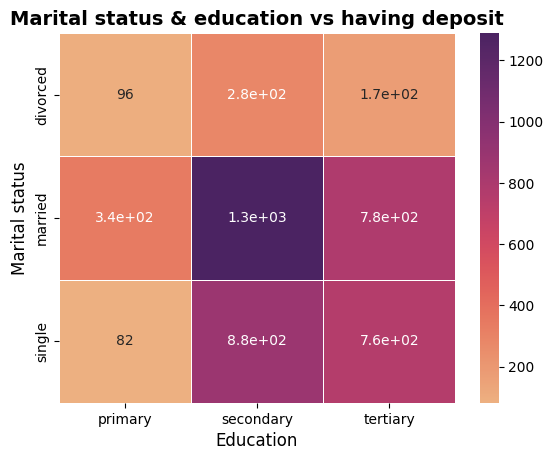

In [70]:
# постройте сводную таблицу, чтобы определить люди с каким образованием и семейным статусом наиболее многочисленны
#(если рассматривать тех, кто открыл депозит)
pivot = pd.pivot_table(
    dfc[dfc['deposit']=='yes'],
    values= 'deposit',
    index= 'marital',
    columns='education',
    aggfunc='count'    
)

hm = sns.heatmap(pivot,annot=False, linewidths=.5, cmap='flare')
hm.set_title('Marital status & education vs having deposit', fontsize=14, fontweight='bold')
hm.set_ylabel('Marital status', fontsize=12)
hm.set_xlabel('Education', fontsize=12);

In [71]:
# преобразуйте уровни образования
#ct = ColumnTransformer(transformers=[
#    ('label_enc', OrdinalEncoder(), ['education','age_group'])
#], remainder='passthrough')

oe = OrdinalEncoder()
dfc.loc[:, ['education', 'age_group']] = oe.fit_transform(dfc.loc[:, ['education', 'age_group']])
dfc['education'] = dfc['education'].astype(np.int32)
dfc['age_group'] = dfc['age_group'].astype(np.int32)
dfc['education'].sum()

11995

In [72]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10105 entries, 0 to 11161
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        10105 non-null  int64  
 1   job        10105 non-null  object 
 2   marital    10105 non-null  object 
 3   education  10105 non-null  int32  
 4   default    10105 non-null  object 
 5   balance    10105 non-null  float64
 6   housing    10105 non-null  object 
 7   loan       10105 non-null  object 
 8   contact    10105 non-null  object 
 9   day        10105 non-null  int64  
 10  month      10105 non-null  object 
 11  duration   10105 non-null  int64  
 12  campaign   10105 non-null  int64  
 13  pdays      10105 non-null  int64  
 14  previous   10105 non-null  int64  
 15  poutcome   10105 non-null  object 
 16  deposit    10105 non-null  object 
 17  age_group  10105 non-null  int32  
dtypes: float64(1), int32(2), int64(6), object(9)
memory usage: 1.4+ MB


### Задания 2 и 3

In [73]:
# преобразуйте бинарные переменные в представление из нулей и единиц
l = ['deposit', 'default', 'housing', 'loan']

for k in l:
    dfc[k] = dfc[k].apply(lambda x: 1 if x=='yes' else 0)

#dfc['deposit'].describe().round(3)

In [74]:
res=0
for m in ['default', 'housing', 'loan']:
    res += dfc[m].mean()
print(round(res,3))

0.635


### Задание 4

In [75]:
# создайте дамми-переменные
dfc = pd.get_dummies(dfc, columns=['job', 'marital', 'contact', 'month', 'poutcome']) #drop_first=True,

### Задания 5 и 6

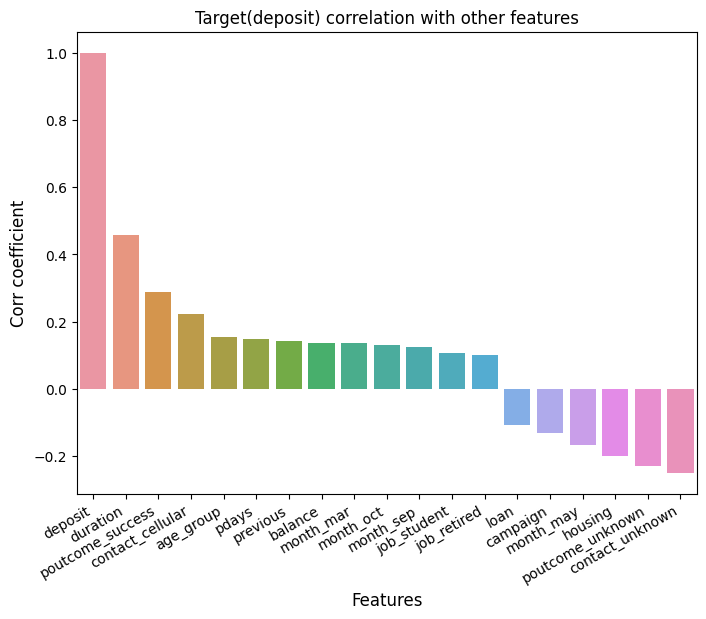

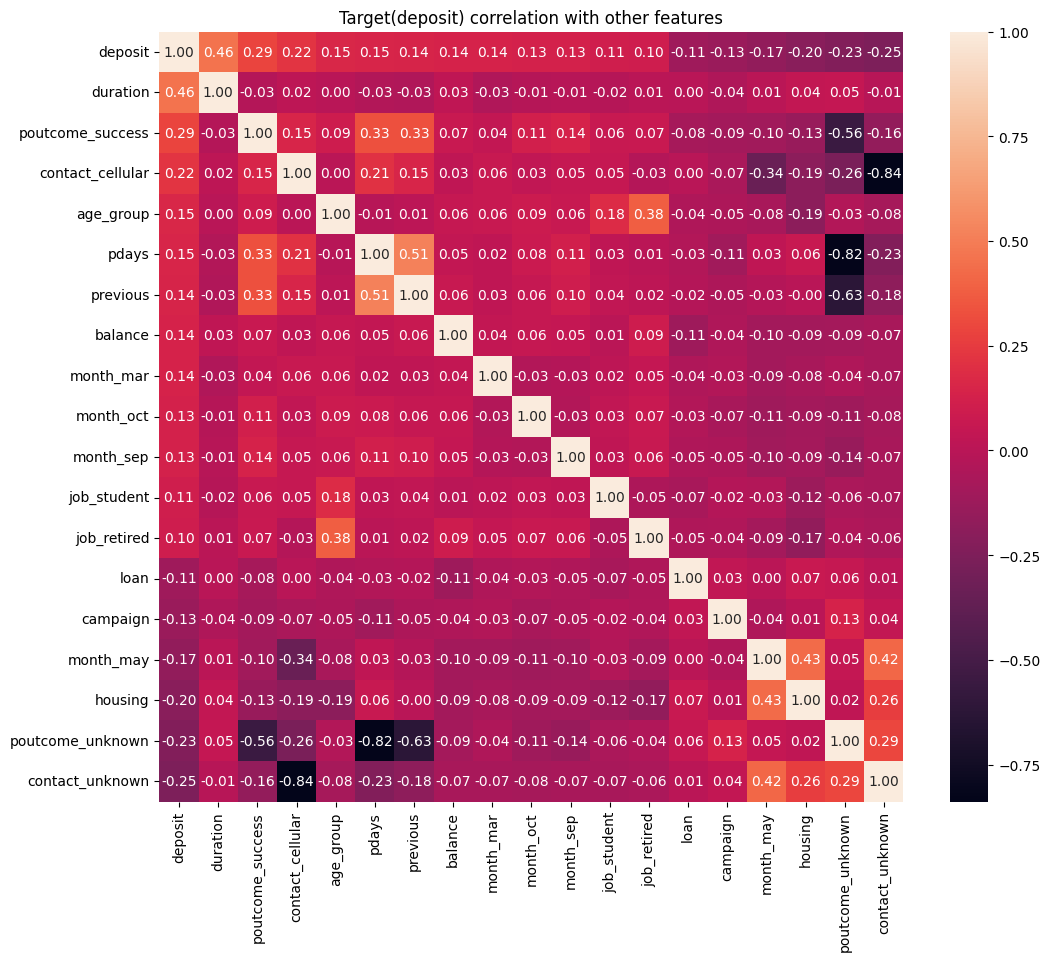

In [76]:
# постройте корреляционную матрицу и оцените данные на предмет наличия мультиколлинеарности
df_corr = dfc.corr()['deposit'].sort_values(ascending=False).reset_index()

plt.subplots(figsize=(8,6))
bp_corr = sns.barplot(df_corr[abs(df_corr['deposit'])>0.1], x='index', y='deposit');
bp_corr.set_title('Target(deposit) correlation with other features')
bp_corr.set_ylabel('Corr coefficient', fontsize=12)
bp_corr.set_xlabel('Features', fontsize=12);
#bp_corr.tick_params(axis='x', rotation=50)
plt.xticks(rotation=30, ha='right');
#sns.heatmap(dfc.corr(numeric_only=True), annot=True)

corr_fea = df_corr[abs(df_corr['deposit'])>0.1]['index'].tolist()
plt.subplots(figsize=(12,10))
sns.heatmap(dfc[corr_fea].corr(), annot=True, fmt='.2f').set_title('Target(deposit) correlation with other features');

### Задания 7 и 8

In [77]:
X = dfc.drop(['deposit'], axis=1)
y = dfc['deposit']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42, test_size = 0.33)

In [78]:
# рассчитайте необходимые показатели
print(X_test.shape)
print(round(y_test.mean(),2))

(3335, 45)
0.46


### Задание 9

In [79]:
# с помощью SelectKBest отберите 15 наиболее подходящих признаков
selector = SelectKBest(f_classif, k=15)
selector.fit(X_train, y_train)
 
best_fea = selector.get_feature_names_out()
X_train = X_train[best_fea]
X_test = X_test[best_fea]
best_fea

array(['balance', 'housing', 'duration', 'campaign', 'pdays', 'previous',
       'age_group', 'contact_cellular', 'contact_unknown', 'month_mar',
       'month_may', 'month_oct', 'month_sep', 'poutcome_success',
       'poutcome_unknown'], dtype=object)

### Задание 10

In [80]:
cols = X_train.columns

# нормализуйте данные с помощью minmaxsxaler
scaler = preprocessing.MinMaxScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [81]:
#X_test_scaled.mean(axis=0).round(2)
X_test_scaled[:,0].mean().round(2)

0.47

# Часть 4: Решение задачи классификации: логистическая регрессия и решающие деревья

### Задание 1

In [82]:
# обучите логистическую регрессию и рассчитайте метрики качества
log_reg = linear_model.LogisticRegression(random_state=42, solver='sag', max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred = log_reg.predict(X_test_scaled)
#print('Accuracy: {:.2f}'.format(metrics.accuracy_score(y_test, y_pred)))
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83      1790
           1       0.83      0.74      0.78      1545

    accuracy                           0.81      3335
   macro avg       0.81      0.80      0.80      3335
weighted avg       0.81      0.81      0.81      3335



### Задания 2,3,4

In [83]:
# обучите решающие деревья, настройте максимальную глубину
dt = tree.DecisionTreeClassifier(
    #criterion='gini', 
    criterion='entropy',
    random_state=42, #генератор случайных чисел
    #max_depth=6
)

dt.fit(X_train_scaled, y_train)

y_pred_train = dt.predict(X_train_scaled)
y_pred_test = dt.predict(X_test_scaled)

print(f"TRAIN {metrics.classification_report(y_train, y_pred_train)}")
print(f"TEST {metrics.classification_report(y_test, y_pred_test)}")

TRAIN               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3634
           1       1.00      1.00      1.00      3136

    accuracy                           1.00      6770
   macro avg       1.00      1.00      1.00      6770
weighted avg       1.00      1.00      1.00      6770

TEST               precision    recall  f1-score   support

           0       0.77      0.77      0.77      1790
           1       0.74      0.73      0.73      1545

    accuracy                           0.75      3335
   macro avg       0.75      0.75      0.75      3335
weighted avg       0.75      0.75      0.75      3335



Max TEST accuracy 0.81 with max_depth 7
Max TEST f1       0.8 with max_depth 6


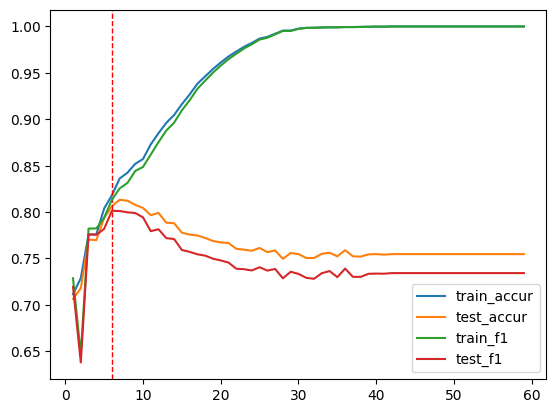

In [84]:
train = {'accuracy':[], 'f1':[]}
test = {'accuracy':[], 'f1':[]}
depths = np.arange(1,60,1)

for k in depths:
    dt = tree.DecisionTreeClassifier(
    #criterion='gini', 
    criterion='entropy',
    random_state=42, #генератор случайных чисел
    max_depth=k)

    dt.fit(X_train_scaled, y_train)

    y_pred_train = dt.predict(X_train_scaled)
    y_pred_test = dt.predict(X_test_scaled)

    train['accuracy'].append(metrics.accuracy_score(y_train, y_pred_train))
    train['f1'].append(metrics.f1_score(y_train, y_pred_train))
    test['accuracy'].append(metrics.accuracy_score(y_test, y_pred_test))
    test['f1'].append(metrics.f1_score(y_test, y_pred_test))

lp_te = sns.lineplot(x=depths, y=train['accuracy'], label='train_accur');
lp_tr = sns.lineplot(x=depths, y=test['accuracy'], label='test_accur');
lp_te.axvline(np.argmax(test['f1'])+1, color='r', lw=1, ls='--')
sns.lineplot(x=depths, y=train['f1'], label='train_f1');
sns.lineplot(x=depths, y=test['f1'], label='test_f1');

print(f"Max TEST accuracy {round(max(test['accuracy']),2)} with max_depth {np.argmax(test['accuracy'])+1}")
print(f"Max TEST f1       {round(max(test['f1']),2)} with max_depth {np.argmax(test['f1'])+1}")

In [85]:
# обучите решающие деревья, настройте максимальную глубину
dt = tree.DecisionTreeClassifier(
    #criterion='gini', 
    criterion='entropy',
    random_state=42, #генератор случайных чисел
    max_depth=6
)

dt.fit(X_train_scaled, y_train)

y_pred_train = dt.predict(X_train_scaled)
y_pred_test = dt.predict(X_test_scaled)

print(f"TRAIN {metrics.classification_report(y_train, y_pred_train)}")
print(f"TEST {metrics.classification_report(y_test, y_pred_test)}")

TRAIN               precision    recall  f1-score   support

           0       0.86      0.79      0.82      3634
           1       0.77      0.86      0.81      3136

    accuracy                           0.82      6770
   macro avg       0.82      0.82      0.82      6770
weighted avg       0.82      0.82      0.82      6770

TEST               precision    recall  f1-score   support

           0       0.85      0.77      0.81      1790
           1       0.76      0.84      0.80      1545

    accuracy                           0.81      3335
   macro avg       0.81      0.81      0.81      3335
weighted avg       0.81      0.81      0.81      3335



### Задание 5

In [86]:
# подберите оптимальные параметры с помощью gridsearch
param_grid = {#'penalty': ['l2', 'none'],
            #'solver': ['lbfgs', 'saga'],
            'min_samples_split': [2, 5, 7, 10],
            'max_depth':[3,5,7]}

gs = GridSearchCV(
    estimator=tree.DecisionTreeClassifier(
        random_state=42,
        criterion='entropy',
    ), 
    param_grid=param_grid, 
    cv=5, 
    n_jobs = -1
)  
%time 
gs.fit(X_train_scaled, y_train) 

y_pred_train = gs.predict(X_train_scaled)
y_pred_test = gs.predict(X_test_scaled)

print(f"TRAIN {metrics.classification_report(y_train, y_pred_train)}")
print(f"TEST {metrics.classification_report(y_test, y_pred_test)}")
print("Наилучшие значения гиперпараметров: {}".format(gs.best_params_))

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.01 µs
TRAIN               precision    recall  f1-score   support

           0       0.86      0.84      0.85      3634
           1       0.81      0.84      0.83      3136

    accuracy                           0.84      6770
   macro avg       0.84      0.84      0.84      6770
weighted avg       0.84      0.84      0.84      6770

TEST               precision    recall  f1-score   support

           0       0.83      0.81      0.82      1790
           1       0.79      0.81      0.80      1545

    accuracy                           0.81      3335
   macro avg       0.81      0.81      0.81      3335
weighted avg       0.81      0.81      0.81      3335

Наилучшие значения гиперпараметров: {'max_depth': 7, 'min_samples_split': 2}


TEST f1=0.79 expected

# Часть 5: Решение задачи классификации: ансамбли моделей и построение прогноза

### Задание 1

In [87]:
# обучите на ваших данных случайный лес
rf= ensemble.RandomForestClassifier(
    n_estimators=100, 
    criterion='gini', 
    max_depth=10, 
    min_samples_leaf=5, 
    random_state=42 
)
#Обучаем модель 
rf.fit(X_train_scaled, y_train)

y_pred_train = rf.predict(X_train_scaled)
y_pred_test = rf.predict(X_test_scaled)

print(f"TRAIN {metrics.classification_report(y_train, y_pred_train)}")
print(f"TEST {metrics.classification_report(y_test, y_pred_test)}")


TRAIN               precision    recall  f1-score   support

           0       0.87      0.86      0.87      3634
           1       0.84      0.85      0.85      3136

    accuracy                           0.86      6770
   macro avg       0.86      0.86      0.86      6770
weighted avg       0.86      0.86      0.86      6770

TEST               precision    recall  f1-score   support

           0       0.85      0.83      0.84      1790
           1       0.80      0.83      0.82      1545

    accuracy                           0.83      3335
   macro avg       0.83      0.83      0.83      3335
weighted avg       0.83      0.83      0.83      3335



TEST recall=0.84 expected

### Задания 2 и 3

In [88]:
# используйте для классификации градиентный бустинг и сравните качество со случайным лесом
gb = GradientBoostingClassifier(
        learning_rate = 0.05,
        n_estimators = 300,
        min_samples_leaf = 5,
        max_depth = 5,
        random_state = 42
)

# Обучаем модель
gb.fit(X_train_scaled, y_train)

y_pred_train = gb.predict(X_train_scaled)
y_pred_test = gb.predict(X_test_scaled)

print(f"TRAIN {metrics.classification_report(y_train, y_pred_train)}")
print(f"TEST {metrics.classification_report(y_test, y_pred_test)}")

TRAIN               precision    recall  f1-score   support

           0       0.90      0.89      0.89      3634
           1       0.87      0.89      0.88      3136

    accuracy                           0.89      6770
   macro avg       0.89      0.89      0.89      6770
weighted avg       0.89      0.89      0.89      6770

TEST               precision    recall  f1-score   support

           0       0.85      0.82      0.83      1790
           1       0.80      0.83      0.82      1545

    accuracy                           0.83      3335
   macro avg       0.82      0.83      0.82      3335
weighted avg       0.83      0.83      0.83      3335



### Задание 4

In [89]:
# объедините уже известные вам алгоритмы с помощью стекинга 
estimators = [
    ('dr',tree.DecisionTreeClassifier(
        random_state=42,
        criterion='entropy',
        min_samples_split=2,
        max_depth=7)),
    ('rf', ensemble.RandomForestClassifier(
        n_estimators=100, 
        criterion='gini', 
        max_depth=10, 
        min_samples_leaf=5, 
        random_state=42)),
    ('gb', GradientBoostingClassifier(
        learning_rate = 0.05,
        n_estimators = 300,
        min_samples_leaf = 5,
        max_depth = 5,
        random_state = 42))    
]

# Создаем объект класса стекинг
sr = StackingClassifier(
    estimators=estimators,
    #final_estimator=RandomForestRegressor(n_estimators=10, random_state=42)
    final_estimator=linear_model.LogisticRegression(random_state=42, solver='sag', max_iter=1000)
)
# Обучаем модель
sr.fit(X_train_scaled, y_train)

y_pred_train = sr.predict(X_train_scaled)
y_pred_test = sr.predict(X_test_scaled)

print(f"TRAIN {metrics.classification_report(y_train, y_pred_train)}")
print(f"TEST {metrics.classification_report(y_test, y_pred_test)}")

TRAIN               precision    recall  f1-score   support

           0       0.89      0.88      0.88      3634
           1       0.86      0.87      0.86      3136

    accuracy                           0.87      6770
   macro avg       0.87      0.87      0.87      6770
weighted avg       0.87      0.87      0.87      6770

TEST               precision    recall  f1-score   support

           0       0.84      0.83      0.84      1790
           1       0.81      0.82      0.81      1545

    accuracy                           0.83      3335
   macro avg       0.82      0.82      0.82      3335
weighted avg       0.83      0.83      0.83      3335



TEST precision=0.82 expected

### Задание 5

In [90]:
len(X_train.columns)
#len(dt.feature_importances_)

15

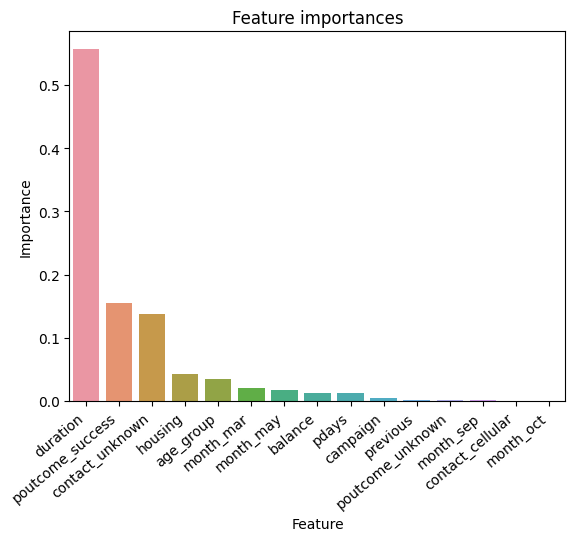

In [91]:
# оцените, какие признаки демонстрируют наибольшую  важность в модели градиентного бустинга
fea_imp = pd.DataFrame({'feature':X_train.columns, 'importance':dt.feature_importances_}).sort_values(by='importance', ascending=False)
fea_imp.sort_values(by='importance', ascending=False)

bp_imp = sns.barplot(fea_imp, x='feature', y='importance')
bp_imp.set(xlabel='Feature', ylabel='Importance', title=f"Feature importances")
plt.xticks(rotation=40, ha='right');
#bp_imp.tick_params(axis='x',rotation=40, direction='out', pad=2, length=5, grid_alpha=0.3, which='both', color='red')

### Задания 6,7,8

In [92]:
# реализуйте оптимизацию гиперпараметров с помощью Optuna
def optuna_rf(trial):
  n_estimators = trial.suggest_int('n_estimators', 100, 200, 1)
  max_depth = trial.suggest_int('max_depth', 10, 30, 1)
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10, 1)

  model = ensemble.RandomForestClassifier(n_estimators=n_estimators,
                                          max_depth=max_depth,
                                          min_samples_leaf=min_samples_leaf,
                                          random_state=42)
  model.fit(X_train_scaled, y_train)
  score = metrics.f1_score(y_train, model.predict(X_train_scaled))
  return score

study = optuna.create_study(study_name="RandomForestClassifier", direction="maximize")

study.optimize(optuna_rf, n_trials=20)

print("Наилучшие значения гиперпараметров {}".format(study.best_params))
print("f1_score на обучающем наборе: {:.2f}".format(study.best_value))

[I 2023-10-30 10:22:07,952] A new study created in memory with name: RandomForestClassifier
[I 2023-10-30 10:22:08,554] Trial 0 finished with value: 0.8779724655819775 and parameters: {'n_estimators': 144, 'max_depth': 20, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.8779724655819775.
[I 2023-10-30 10:22:09,334] Trial 1 finished with value: 0.8928794503435352 and parameters: {'n_estimators': 180, 'max_depth': 25, 'min_samples_leaf': 3}. Best is trial 1 with value: 0.8928794503435352.
[I 2023-10-30 10:22:09,979] Trial 2 finished with value: 0.865695032126626 and parameters: {'n_estimators': 168, 'max_depth': 12, 'min_samples_leaf': 3}. Best is trial 1 with value: 0.8928794503435352.
[I 2023-10-30 10:22:10,566] Trial 3 finished with value: 0.9204456300015691 and parameters: {'n_estimators': 125, 'max_depth': 23, 'min_samples_leaf': 2}. Best is trial 3 with value: 0.9204456300015691.
[I 2023-10-30 10:22:11,098] Trial 4 finished with value: 0.8474097331240188 and parameters: {'n_e

Наилучшие значения гиперпараметров {'n_estimators': 198, 'max_depth': 30, 'min_samples_leaf': 2}
f1_score на обучающем наборе: 0.92


In [93]:
model = ensemble.RandomForestClassifier(**study.best_params,random_state=42)
model.fit(X_train_scaled, y_train)

y_pred_train = sr.predict(X_train_scaled)
y_pred_test = sr.predict(X_test_scaled)

print(f"TRAIN {metrics.classification_report(y_train, y_pred_train)}")
print(f"TEST {metrics.classification_report(y_test, y_pred_test)}")


#y_train_pred = model.predict(X_train_scaled)
#print("accuracy на тестовом наборе: {:.2f}".format(model.score(X_test_scaled, y_test)))
#y_test_pred = model.predict(X_test_scaled)
#print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

TRAIN               precision    recall  f1-score   support

           0       0.89      0.88      0.88      3634
           1       0.86      0.87      0.86      3136

    accuracy                           0.87      6770
   macro avg       0.87      0.87      0.87      6770
weighted avg       0.87      0.87      0.87      6770

TEST               precision    recall  f1-score   support

           0       0.84      0.83      0.84      1790
           1       0.81      0.82      0.81      1545

    accuracy                           0.83      3335
   macro avg       0.82      0.82      0.82      3335
weighted avg       0.83      0.83      0.83      3335



TEST f1=0.83, accuracy=0.84 expected